### Import Libraries

In [ ]:
import numpy as np
import cv2
import os

from matplotlib import pyplot as plt
from tqdm import tqdm
import pickle

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
# write correct path to the folder with training_set.npz
%cd '/gdrive/My Drive/My[2024-2025] AN2DL/HW1'

Mounted at /gdrive
/gdrive/My Drive/My[2024-2025] AN2DL/HW1


### Load Data

In [ ]:
data = np.load('training_set.npz')
X = data['images']
y = data['labels']
labels = np.unique(y)

In [ ]:
print(X.shape, y.shape)
print(labels)

(13759, 96, 96, 3) (13759, 1)
[0 1 2 3 4 5 6 7]


### Delete duplicates

we need to delete duplicated images to make dataset cleaner

In [ ]:
def dhash(image, hashSize=8):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (hashSize + 1, hashSize))
    diff = resized[:, 1:] > resized[:, :-1]
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [ ]:
def delete_dupl(hashes, X, y, remove = 1):
    to_del = []
    for (h, hashes_idx) in hashes.items():
        if len(hashes_idx) > 1:
            print(f"this hash has {len(hashes_idx)} repetitions")
            for p in hashes_idx[0:]:
                to_del.append(p)

    print(f'we need to delete {len(to_del)} images')
    return to_del

In [ ]:
def count_hashes(X):
    hashes = {}
    for idx, el in tqdm(enumerate(X)):
        image = el
        h = dhash(image)
        p = hashes.get(h, [])
        p.append(idx)
        hashes[h] = p
    return hashes

In [ ]:
hashes = count_hashes(X)
to_del = delete_dupl(hashes, X, y, remove = 0)

13759it [00:00, 27599.50it/s]

this hash has 2 repetitions
this hash has 2 repetitions
this hash has 2 repetitions
this hash has 2 repetitions
this hash has 2 repetitions
this hash has 2 repetitions
this hash has 2 repetitions
this hash has 2 repetitions
this hash has 1600 repetitions
this hash has 200 repetitions
we need to delete 1816 images


In [ ]:
to_del.sort()
to_del[:5]

[120, 810, 1074, 3052, 3328]

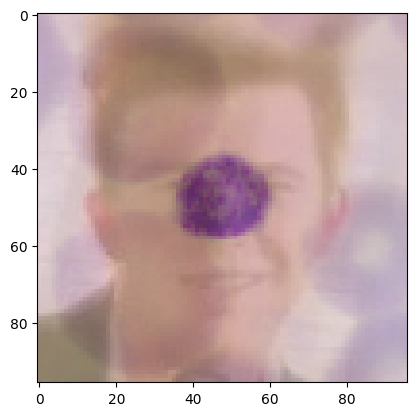

In [ ]:
plt.imshow(X[to_del[-10]])

In [ ]:
new_X = np.delete(X, to_del, axis = 0)
new_y = np.delete(y, to_del, axis = 0)

In [ ]:
print(X.shape, y.shape)
print(new_X.shape, new_y.shape)

(13759, 96, 96, 3) (13759, 1)
(11943, 96, 96, 3) (11943, 1)


### Save new data without outliers

In [ ]:
save_path = "trainig_set_no_outliers.npz"
np.savez(save_path, images=new_X, labels =new_y)